In [1]:
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk

def expand_pos_tag(tag):
    tag_definitions = {
         "NN": "Noun, singular or mass",
        "NNS": "Noun, plural",
        "NNP": "Proper noun, singular",
        "NNPS": "Proper noun, plural",
        "VB": "Verb, base form",
        "VBD": "Verb, past tense",
        "VBG": "Verb, gerund or present participle",
        "VBN": "Verb, past participle",
        "VBP": "Verb, non-3rd person singular present",
        "VBZ": "Verb, 3rd person singular present",
        "JJ": "Adjective",
        "JJR": "Adjective, comparative",
        "JJS": "Adjective, superlative",
        "RB": "Adverb",
        "RBR": "Adverb, comparative",
        "RBS": "Adverb, superlative",
        "PRP": "Personal pronoun",
        "PRP$": "Possessive pronoun",
        "IN": "Preposition or subordinating conjunction",
        "DT": "Determiner",
        "CC": "Coordinating conjunction",
        "CD": "Cardinal number",
        "MD": "Modal",
        "EX": "Existential there",
        "FW": "Foreign word",
        "POS": "Possessive ending",
        "RP": "Particle",
        "TO": "to",
        "WDT": "Wh-determiner",
        "WP": "Wh-pronoun",
        "WP$": "Possessive wh-pronoun",
        "WRB": "Wh-adverb"
    }
    return tag_definitions.get(tag, "Other")

def process_text(text1, text2):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))

    # Combine the two texts
    combined_text = text1 + " " + text2

    # Convert to lower case and remove punctuation, apostrophes, and quotations
    combined_text = combined_text.lower().translate(str.maketrans('', '', string.punctuation + "‘’“”"))

    # Tokenize and filter out stopwords
    tokens = word_tokenize(combined_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    word_freq.update(filtered_tokens)

    # POS Tagging and expansion
    tagged = pos_tag(filtered_tokens)
    all_tags.update([expand_pos_tag(tag) for _, tag in tagged])

    return word_freq, all_tags

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin.""" # [Your first text blurb here]
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings.""" # [Your second text blurb here]

word_freq, all_tags = process_text(text_blurb1, text_blurb2)

# Print most common words and POS tags
print("Most common words:")
for word, freq in word_freq.most_common(10):
    print(f"{word}: {freq}")

print("\nMost common Part Of Speech tags:")
for tag, count in all_tags.most_common(10):
    print(f"{tag}: {count}")

Most common words:
timmy: 8
man: 8
edric: 7
one: 7
upon: 6
wise: 6
said: 6
kingdom: 6
like: 5
eyes: 5

Most common Part Of Speech tags:
Noun, singular or mass: 140
Adjective: 93
Verb, past tense: 57
Noun, plural: 46
Adverb: 23
Verb, past participle: 22
Verb, gerund or present participle: 22
Preposition or subordinating conjunction: 18
Verb, non-3rd person singular present: 15
Verb, base form: 12


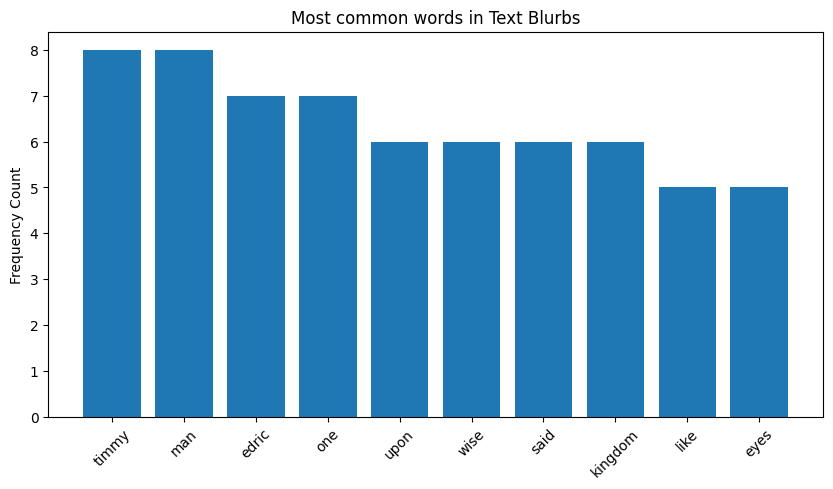

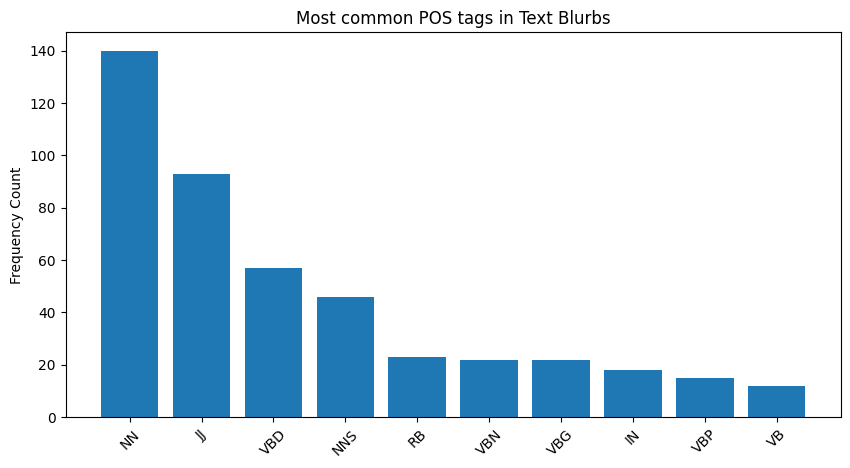

In [3]:
import matplotlib.pyplot as plt
import string
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
import nltk

def plot_common_elements(counter, title):
    elements, counts = zip(*counter.most_common(10))
    plt.figure(figsize=(10, 5))
    plt.bar(elements, counts)
    plt.title(title)
    plt.ylabel("Frequency Count")
    plt.xticks(rotation=45)
    plt.show()

def process_text(text1, text2):
    word_freq = Counter()
    all_tags = Counter()
    stop_words = set(stopwords.words('english'))

    # Combine the two texts
    combined_text = text1 + " " + text2

    # Convert to lower case and remove punctuation
    combined_text = combined_text.lower().translate(str.maketrans('', '', string.punctuation + "‘’“”"))

    # Tokenize and filter out stopwords
    tokens = word_tokenize(combined_text)
    filtered_tokens = [word for word in tokens if word not in stop_words]
    word_freq.update(filtered_tokens)

    # POS Tagging
    tagged = pos_tag(filtered_tokens)
    all_tags.update([tag for _, tag in tagged])

    return word_freq, all_tags

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin.""" # Your first text blurb
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings.""" # Your second text blurb

word_freq, all_tags = process_text(text_blurb1, text_blurb2)

# Visualize the most common words and POS tags from the combined text blurbs
plot_common_elements(word_freq, "Most common words in Text Blurbs")
plot_common_elements(all_tags, "Most common POS tags in Text Blurbs")

Total number of sentences: 68
Total number of words: 989
Part Of Speech counts: {'ADP': 86, 'DET': 81, 'NOUN': 164, 'PROPN': 28, 'PUNCT': 168, 'SCONJ': 23, 'VERB': 139, 'CCONJ': 23, 'PRON': 105, 'ADJ': 71, 'NUM': 5, 'ADV': 28, 'AUX': 37, 'SPACE': 14, 'INTJ': 5, 'PART': 12}


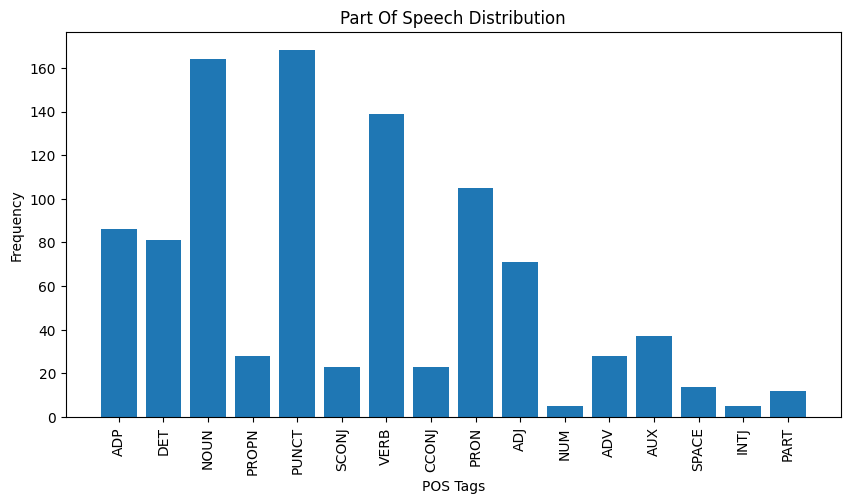

In [4]:
import matplotlib.pyplot as plt
import spacy

# Load the SpaCy model
nlp = spacy.load('en_core_web_sm')

def analyze_sentence_structure(text1, text2):
    sentence_count = 0
    word_count = 0
    pos_count = {}

    # Process each text separately and combine the results
    for text in [text1, text2]:
        doc = nlp(text)
        for sent in doc.sents:
            sentence_count += 1
            for token in sent:
                word_count += 1
                pos_count[token.pos_] = pos_count.get(token.pos_, 0) + 1

    return sentence_count, word_count, pos_count

def plot_pos_distribution(pos_count):
    labels, values = zip(*pos_count.items())
    plt.figure(figsize=(10, 5))
    plt.bar(labels, values)
    plt.title('Part Of Speech Distribution')
    plt.xlabel('POS Tags')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)  # Rotate labels for better readability
    plt.show()

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you.""" # Your first text blurb
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings.""" # Your second text blurb

sentence_count, word_count, pos_count = analyze_sentence_structure(text_blurb1, text_blurb2)

print(f"Total number of sentences: {sentence_count}")
print(f"Total number of words: {word_count}")
print("Part Of Speech counts:", pos_count)

# Visualize the POS distribution
plot_pos_distribution(pos_count)


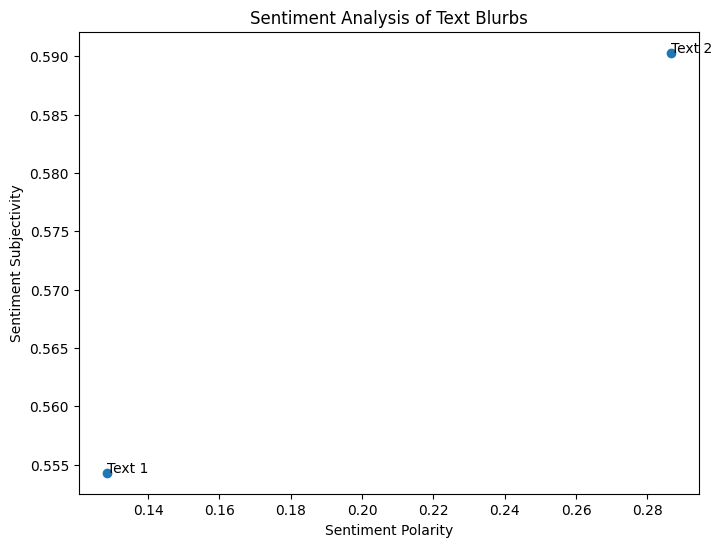

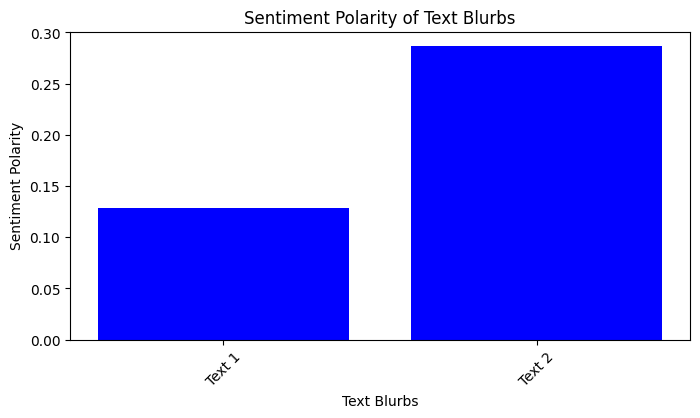

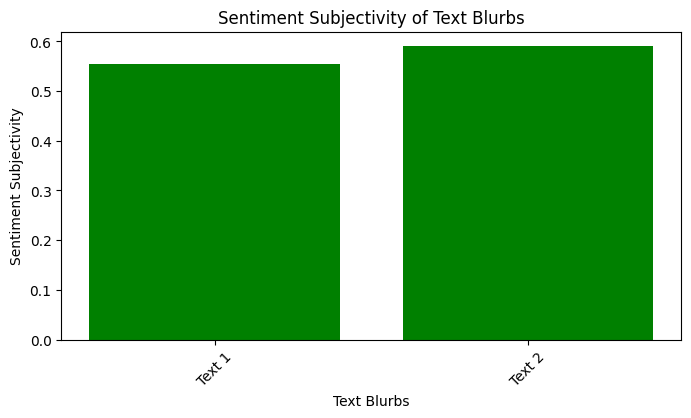

In [5]:
import matplotlib.pyplot as plt
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment

# Two sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin."""
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings."""

# Analyze sentiment of the text blurbs
sentiment1 = analyze_sentiment(text_blurb1)
sentiment2 = analyze_sentiment(text_blurb2)

sentiments = [("Text 1", sentiment1.polarity, sentiment1.subjectivity),
              ("Text 2", sentiment2.polarity, sentiment2.subjectivity)]

# Extracting labels, polarities, and subjectivities
labels, polarities, subjectivities = zip(*sentiments)

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(polarities, subjectivities)
plt.xlabel('Sentiment Polarity')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Analysis of Text Blurbs')
for i, label in enumerate(labels):
    plt.annotate(label, (polarities[i], subjectivities[i]))
plt.show()

# Bar Chart for Polarity
plt.figure(figsize=(8, 4))
plt.bar(labels, polarities, color='blue')
plt.xlabel('Text Blurbs')
plt.ylabel('Sentiment Polarity')
plt.title('Sentiment Polarity of Text Blurbs')
plt.xticks(rotation=45)
plt.show()

# Bar Chart for Subjectivity
plt.figure(figsize=(8, 4))
plt.bar(labels, subjectivities, color='green')
plt.xlabel('Text Blurbs')
plt.ylabel('Sentiment Subjectivity')
plt.title('Sentiment Subjectivity of Text Blurbs')
plt.xticks(rotation=45)
plt.show()

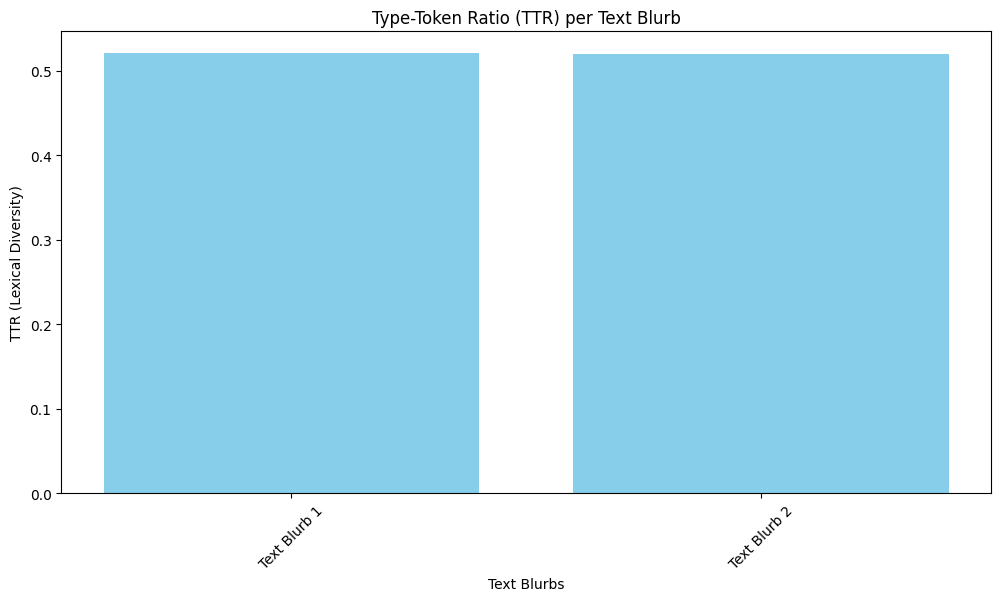

Overall Lexical Diversity for both Text Blurbs: 0.429


In [6]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk

# Function to calculate TTR
def calculate_ttr(text):
    tokens = word_tokenize(text)
    types = set(tokens)
    if len(tokens) == 0:
        return 0
    return len(types) / len(tokens)

# Function to plot TTR
def plot_ttr(ttr_values, title):
    blurbs, ttr_scores = zip(*ttr_values)
    plt.figure(figsize=(12, 6))
    plt.bar(blurbs, ttr_scores, color='skyblue')
    plt.xlabel('Text Blurbs')
    plt.ylabel('TTR (Lexical Diversity)')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin."""
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings."""

ttr_values = [
    ("Text Blurb 1", calculate_ttr(text_blurb1)),
    ("Text Blurb 2", calculate_ttr(text_blurb2))
]

# Plot TTR for each text blurb
plot_ttr(ttr_values, "Type-Token Ratio (TTR) per Text Blurb")

# Overall TTR for both text blurbs combined
overall_text = text_blurb1 + " " + text_blurb2
overall_ttr = calculate_ttr(overall_text)
print(f"Overall Lexical Diversity for both Text Blurbs: {overall_ttr:.3f}")


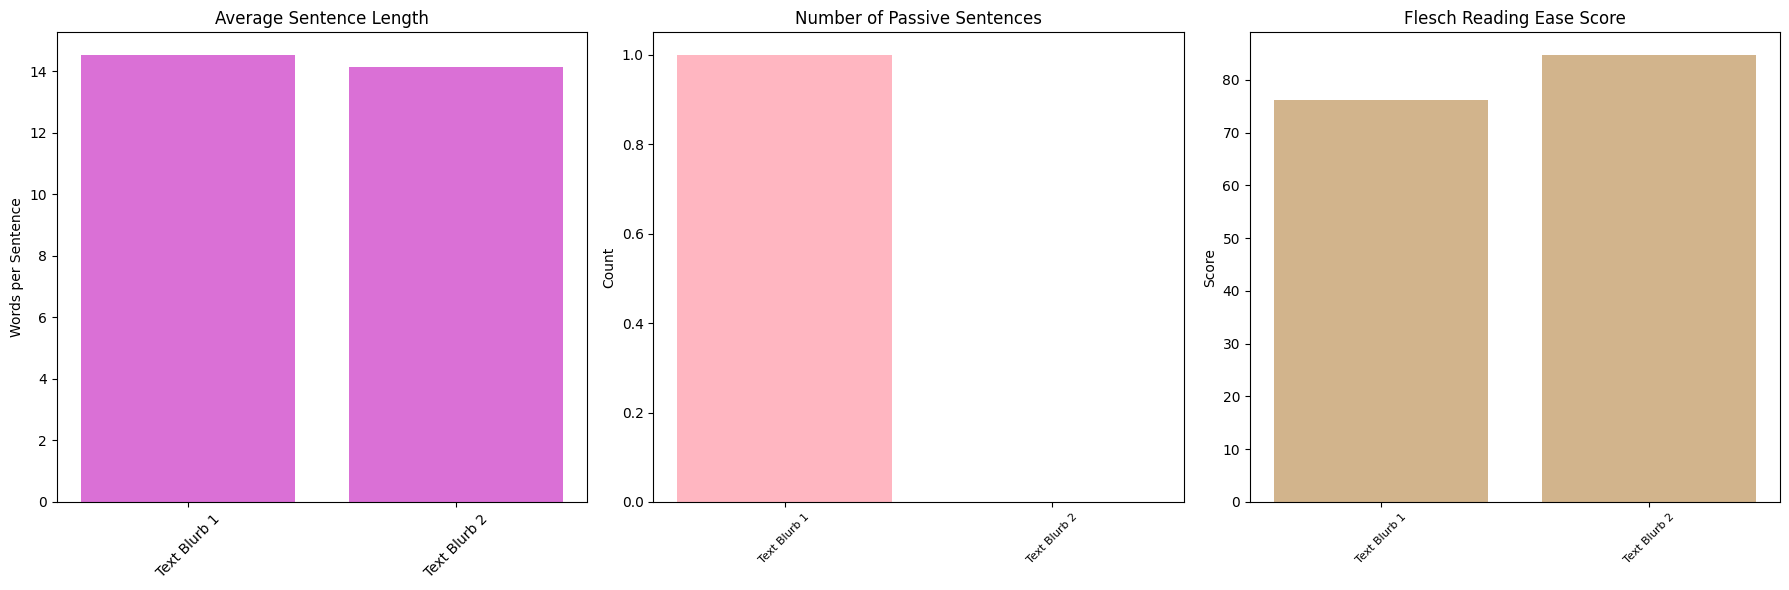

In [7]:
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from textblob import TextBlob
import textstat

# Function to analyze the style of a given text
def analyze_style(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:
        return 0, 0, 0  # Avoid division by zero

    average_sentence_length = sum(len(word_tokenize(sentence)) for sentence in sentences) / len(sentences)
    blob = TextBlob(text)
    passive_sentences = sum(1 for sentence in blob.sentences if sentence.tags and sentence.tags[0][1] in ['VBN', 'VBD'])

    flesch_reading_ease = textstat.flesch_reading_ease(text)

    return average_sentence_length, passive_sentences, flesch_reading_ease

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin."""
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings."""

# Analyze style for each text blurb
style_data = [
    ("Text Blurb 1", *analyze_style(text_blurb1)),
    ("Text Blurb 2", *analyze_style(text_blurb2))
]

# Extracting data for visualization
blurbs, avg_lengths, passive_counts, reading_eases = zip(*style_data)

# Visualization
plt.figure(figsize=(18, 6))  # Increase the size of the figure

# Average Sentence Length
plt.subplot(1, 3, 1)
plt.bar(blurbs, avg_lengths, color='orchid')
plt.title('Average Sentence Length')
plt.xticks(rotation=45, fontsize=10)  # Rotate and adjust font size
plt.ylabel('Words per Sentence')

# Passive Sentences Count
plt.subplot(1, 3, 2)
plt.bar(blurbs, passive_counts, color='lightpink')
plt.title('Number of Passive Sentences')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Count')

# Flesch Reading Ease Score
plt.subplot(1, 3, 3)
plt.bar(blurbs, reading_eases, color='tan')
plt.title('Flesch Reading Ease Score')
plt.xticks(rotation=45, fontsize=8)  # Rotate and adjust font size
plt.ylabel('Score')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [10]:
import spacy
import re

nlp = spacy.load('en_core_web_sm')

def extract_dialogues(text):
    dialogues = re.findall(r'“([^”]+)”', text)
    cleaned_dialogues = [' '.join(dialogue.split()) for dialogue in dialogues]  # Remove extra spaces and newlines
    return cleaned_dialogues

def extract_characters_and_dialogues(text):
    doc = nlp(text)
    characters = set([ent.text for ent in doc.ents if ent.label_ == "PERSON"])
    dialogues = extract_dialogues(text)
    return characters, dialogues

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin."""
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings."""

# Extract and print characters and dialogues for each text blurb
print("Text Blurb 1:")
characters1, dialogues1 = extract_characters_and_dialogues(text_blurb1)
print("Characters:", characters1)
print("Sample Dialogues:", dialogues1[:5])  # Display first 5 dialogues

print("\nText Blurb 2:")
characters2, dialogues2 = extract_characters_and_dialogues(text_blurb2)
print("Characters:", characters2)
print("Sample Dialogues:", dialogues2[:5])  # Display first 5 dialogues

Text Blurb 1:
Characters: {'Queen Eira', 'Eira', 'Edric', 'Galdor'}
Sample Dialogues: []

Text Blurb 2:
Characters: {'Timmy'}
Sample Dialogues: []


In [12]:
import spacy
from collections import defaultdict

nlp = spacy.load('en_core_web_sm')

def extract_interactions(text):
    doc = nlp(text)
    interactions = defaultdict(int)

    for sent in doc.sents:
        characters = set([ent.text for ent in sent.ents if ent.label_ == "PERSON"])
        for char1 in characters:
            for char2 in characters:
                if char1 != char2:
                    interactions[(char1, char2)] += 1

    return interactions

# Sample text blurbs
text_blurb1 = """In the land of Eleria, where dragons roamed the skies and unicorns pranced in the meadows, there lived a young lad named Edric. One day, while wandering through the forest, he stumbled upon a hidden glade filled with mushrooms that glowed like tiny suns. Little did he know, these enchanted fungi would change his life forever.

"Wow, look at that!" exclaimed Edric, pointing at the luminescent mushrooms. His friend, a wise old wizard named Galdor, came upon the scene, curious about the commotion.

"Ah, you've found our secret garden," said Galdor, nodding his head. "These mushrooms have magical properties; they can grant wishes."

Edric's eyes grew wide with wonder. "Really? Could I try one?" he asked, his voice trembling with excitement.

Galdor chuckled and handed Edric a small, delicate mushroom. "Be careful what you wish for, little one. These mushrooms can be capricious."

Edric took a bite of the mushroom and suddenly felt a strange sensation wash over him. He closed his eyes, and when he opened them again, he found himself transported to a far-off kingdom ruled by a beautiful queen named Eira.

As he marveled at the opulent palace, a servant approached him, bowing low. "Her majesty requests your presence at once," he said, gesturing towards the throne room.

Edric followed the servant, his heart pounding with anticipation. When he entered the throne room, he saw Queen Eira sitting regally upon her throne, surrounded by courtiers and advisors. She looked up as he entered and smiled kindly upon him.

"Welcome, young traveler," she said, her voice musical and soothing. "I have been expecting you. You see, my kingdom is in dire need of a brave knight to slay the fearsome Dragon of Darkness, which has terrorized our lands for too long. Will you answer the call to adventure and save our kingdom from destruction?"

Edric stood tall, his heart bursting with courage. "I would be honored to accept this quest," he declared, his voice firm and resolute. "When do we depart?"

Queen Eira nodded, a hint of pride shining in her eyes. "You may begin your journey forthwith. May the gods of fortune smile upon you."

And with that, Edric bid farewell to the enchanted forest and set off on his perilous quest to defeat the Dragon of Darkness and save the kingdom from ruin."""
text_blurb2 = """One day, in a far-off kingdom, there lived a little prince named Timmy. He was a curious boy with big dreams and adventures to be had. One would think that living in a castle surrounded by rolling hills and sparkling streams would be enough to keep anyone happy, but not for Timmy. He wanted more. More adventure, more excitement, more magic. And so he set out into the world to find it.

As he wandered through the forest, he came upon an old wise man sitting beneath a tall tree. The man looked up at Timmy and smiled kindly. "Ah, young one," he said, "I see you are seeking something beyond your tiny kingdom." Timmy nodded eagerly, his eyes shining with anticipation. "Yes, I want to see all the wonders of the world." The wise man chuckled and patted Timmy's head. "Well, my dear, you have come to the right place. For I can show you the secrets of the universe."

Timmy couldn't believe his luck. He spent hours with the wise man, listening to tales of magical creatures and hidden realms. The old man spoke of dragons that breathed fire and water nymphs who swam in crystal clear rivers. He told stories of enchanted forests where trees bore fruit and flowers sang sweet melodies. Timmy could hardly contain his excitement as he listened to these fantastical accounts.

But then, the wise man spoke of something even more remarkable. "Young one," he said, "you must see this for yourself. Come, I will take you to a land unlike any other. A land where magic flows like a river and creatures flit about like birds in the sky." Timmy's eyes grew wide with wonder. Could it be true? Was there really such a place? He asked the wise man how he might reach this mystical land. The old man smiled once more and said, "Just follow the path that winds up ahead. It will lead you straight to the heart of the magical realm."

Without another word, Timmy set off along the winding trail. The sun began to dip below the horizon, casting a golden glow over the landscape. As he walked, the air grew thick with magic and the scent of blooming wildflowers filled his nostrils. Every step felt like he was walking closer to his dreams. Finally, after what seemed like an eternity, he reached the edge of a glittering lake. Across its still waters, a towering mountain rose, shrouded in mist. Timmy knew that he had found the entrance to the enchanted realm. With a deep breath, he stepped across the threshold and entered a world beyond his wildest imaginings."""

# Extract and print interactions for each text blurb
print("Interactions in Text Blurb 1:")
interactions1 = extract_interactions(text_blurb1)
for pair, count in interactions1.items():
    print(f"{pair}: {count}")

print("\nInteractions in Text Blurb 2:")
interactions2 = extract_interactions(text_blurb2)
for pair, count in interactions2.items():
    print(f"{pair}: {count}")

Interactions in Text Blurb 1:

Interactions in Text Blurb 2:
